In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**DATA SET LOADING and splitting the data set**

In [2]:
df = pd.read_csv('Dataset_Breast Cancer.csv')
print(df.columns)
# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)  # Assuming 'diagnosis' is the target column
y = df['diagnosis']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)



Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Training data shape (X_train, y_train): (455, 31) (455,)
Testing data shape (X_test, y_test): (114, 31) (114,)


**creating and training the model**

In [3]:

model = LogisticRegression()
# Train the model on the training data
model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


**MAKING PREDICTIONS**

In [4]:
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


**EVALUATING THE MODEL**

In [5]:
# **Evaluating the model**
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Accuracy: 0.956140350877193

Confusion Matrix:
 [[70  1]
 [ 4 39]]

Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**Grid Search Parameter Tuning and Evaluation of the tuned Model**

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # 'liblinear' works with both l1 and l2 penalties
}

logistic_regression = LogisticRegression()
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)
print("\n--- Evaluation with Tuned Model ---")
print("Accuracy:", accuracy_tuned)
print("\nConfusion Matrix:\n", conf_matrix_tuned)
print("\nClassification Report:\n", class_report_tuned)



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.9714285714285715

--- Evaluation with Tuned Model ---
Accuracy: 0.9824561403508771

Confusion Matrix:
 [[70  1]
 [ 1 42]]

Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**Parameters Evaluated Above**

In [17]:
best_params

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

**Classification Report Comparison:**

The classification report provides detailed metrics for each class:

**Precision**: The proportion of positive identifications that were actually correct.

**Recall (Sensitivity)**: The proportion of actual positives that were identified correctly.

**F1-score**: The harmonic mean of precision and recall, providing a balanced measure.


Improvements in these metrics, especially for the positive class (if '1' represents the positive diagnosis), indicate a better performing model


In [24]:
print("\n--- Analysis of Classification Reports ---")
print("Initial Model Classification Report:\n", class_report)
print("\nTuned Model Classification Report:\n", class_report_tuned)



--- Analysis of Classification Reports ---
Initial Model Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Tuned Model Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**Confusion Matrix**


Visualizing the confusion matrix helps to understand how many cases were correctly or incorrectly classified.

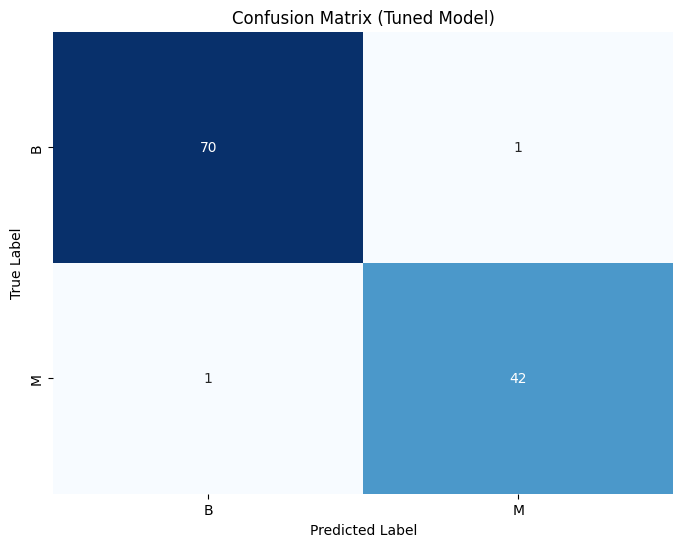

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()


**Interpretation of Confusion Matrix:**

**True Positives (TP)**: Correctly predicted positive cases.

**True Negatives (TN)**: Correctly predicted negative cases.

**False Positives (FP)**: Incorrectly predicted positive cases (Type I error).

**False Negatives (FN)**: Incorrectly predicted negative cases (Type II error).

In a medical context like breast cancer diagnosis
- False Positives (predicting Malignant when it's Benign) can lead to unnecessary anxiety and further tests.
 - False Negatives (predicting Benign when it's Malignant) are more serious as they mean a cancerous tumor is missed, delaying treatment.
Therefore, minimizing False Negatives is often a critical goal, even if it means accepting a higher number of False Positives.


In [14]:
print("\n--- Analysis of Confusion Matrix ---")
print("Tuned Model Confusion Matrix:\n", conf_matrix_tuned)



--- Analysis of Confusion Matrix ---
Tuned Model Confusion Matrix:
 [[70  1]
 [ 1 42]]


**ROC Curve and AUC Score**


The ROC curve evaluates classifier performance across all thresholds. AUC summarizes this performance as a single value.

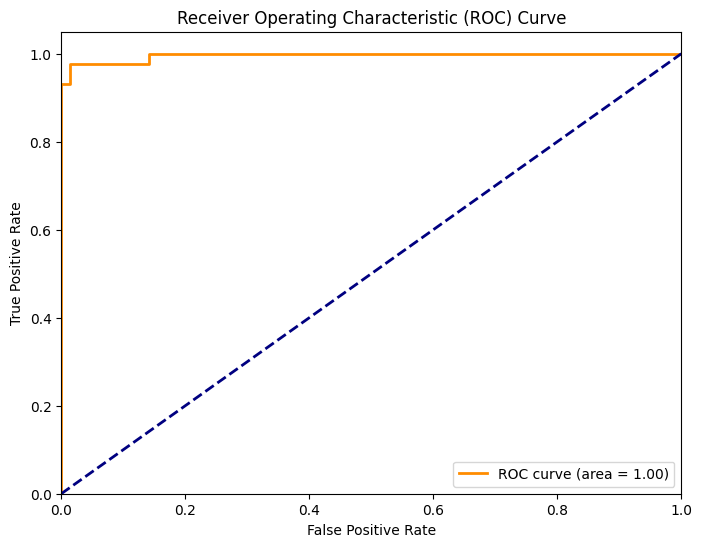


AUC Score for Tuned Model: 1.00


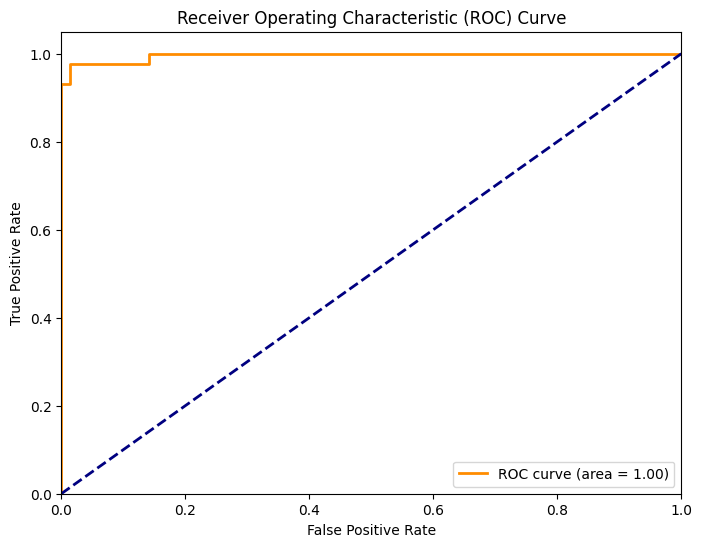


AUC Score for Tuned Model: 1.00


In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tuned, pos_label=best_model.classes_[1]) # Ensure pos_label is the positive class label
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC Score for Tuned Model: {roc_auc:.2f}")

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tuned, pos_label=best_model.classes_[1]) # Ensure pos_label is the positive class label

# Compute AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC Score for Tuned Model: {roc_auc:.2f}")


**ROC Analysis**

The ROC curve plots the True Positive Rate (Sensitivity) against the False Positive Rate (1-Specificity) at various threshold settings.

The True Positive Rate (TPR) is the proportion of actual positives that are correctly identified.

The False Positive Rate (FPR) is the proportion of actual negatives that are incorrectly identified as positive.

The AUC (Area Under the Curve) summarizes the ROC curve performance into a single value.
- AUC ranges from 0 to 1 An AUC of 1 represents a perfect classifier.
- An AUC between 0.8 and 0.9 is generally considered good.
- An AUC between 0.9 and 1 is generally considered excellent.
- An AUC around 0.5 suggests the model is not much better than random guessing

The plot shows how the model performs at different thresholds for classifying instances as positive. You can visually see the trade-off between TPR and FPR. For example, to achieve a higher TPR (catch more positive cases), you might have to accept a higher FPR (incorrectly flag more negative cases as positive).

The **AUC** value provides a single measure of the model's overall ability to discriminate between classes. Compare the AUC value to understand the model's discriminative power.